<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
# importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [68]:
import warnings

warnings.filterwarnings('ignore') 
# ou (warnings.filterwarnings(action='once')) 
# exibe a mensagem uma única vez

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [16]:
# instanciando os dados na variável "dados_1" e "dados_2"
# iremos utilizar somente a variável "dados_2"
dados_1 = pd.read_csv('../Dados/Consumo_cerveja.csv', 
                   sep=',')

In [17]:
dados_2 = pd.read_csv('../Dados/Consumo_cerveja2.csv', 
                   sep=';')

# Exercício

Assinale as alternativas que mostram as funções corretas, da biblioteca **pandas**, para ler um documento CSV e criar um `DataFrame`com o conteúdo deste documento.

- read_csv()

Alternativa correta! 
`Esta foi a função que utilizamos em nossa última aula. Ela oferece suporte para trabalhar com documentos do tipo CSV. Você pode encontrar mais informações na sua documentação.`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

Uma das formas de se tornar um bom profissional em qualquer área, é estudando e praticando o conhecimento adquirido. Na carreira de um cientista de dados, isso é essencial.

Na web, podemos conseguir um volume enorme de material de estudo e também um conjunto bastante variado de `datasets`, para praticar e desenvolver nossos conhecimentos.

Das fontes listadas abaixo, qual utilizamos em nosso projeto?

- UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/datasets.html


- Kaggle - https://www.kaggle.com
    - Alternativa correta! 
`O Kaggle é uma comunidade online focada em data science e machine learning. Além de promover competições sobre estes temas, é uma ótima fonte de dados para treinamento em data science.`


- Portal Brasileiro de Dados Abertos - http://dados.gov.br/


- IBGE - https://www.ibge.gov.br

## Visualizar os dados

In [18]:
# exibindo os dados
dados_1

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dados_2

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


## Verificando o tamanho do dataset

In [23]:
# exibindo a quantidade de linhas e colunas
#dados_2.shape
print(f'''Quantidades de: 
\t - Linhas: {dados_2.shape[0]} e,
\t - Colunas: {dados_2.shape[1]}.''')

Quantidades de: 
	 - Linhas: 365 e,
	 - Colunas: 7.


# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [25]:
dados_2.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
temp_media,365.0,21.23,3.18,12.9,19.02,21.38,23.28,28.86
temp_min,365.0,17.46,2.83,10.6,15.30,17.90,19.60,24.50
temp_max,365.0,26.61,4.32,14.5,23.80,26.90,29.40,36.50
chuva,365.0,5.20,12.42,0.0,0.00,0.00,3.20,94.80
fds,365.0,0.28,0.45,0.0,0.00,0.00,1.00,1.00
consumo,365.0,25401.37,4399.14,14343.0,22008.00,24867.00,28631.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [26]:
dados_2.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


In [27]:
dados_2.corr(method='spearman').round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8647,0.9129,0.0171,-0.0393,0.5700
temp_min,0.8647,1.0000,0.6644,0.1668,-0.0502,0.3915
temp_max,0.9129,0.6644,1.0000,-0.1167,-0.0239,0.6413
chuva,0.0171,0.1668,-0.1167,1.0000,0.0038,-0.1724
fds,-0.0393,-0.0502,-0.0239,0.0038,1.0000,0.4972
consumo,0.5700,0.3915,0.6413,-0.1724,0.4972,1.0000


# Exercício

Sobre a correlação entre as variáveis, julgue as afirmativas abaixo:

1. O coeficiente de correlação é um número que varia entre 0 a 1
2. Em modelos de regressão linear, é importante verificarmos se as variáveis explicativas (X's) têm forte correlação com a variável dependente (Y)
3. Em modelos de regressão linear, é importante que as variáveis explicativas (X's) não tenham forte correlação entre si

    - As afirmativas 2 e 3 são verdadeiras.
        - Alternativa correta! `Lembrando que correlações positivas indicam que as duas variáveis se movem na mesma direção e correlações negativas indicam uma relação oposta.`

Nesta aula, aprendemos:

- Como importar bibliotecas
- Como ler e visualizar os dados
- Como verificar o tamanho do dataset
- Como criar uma tabela com estatísticas descritivas dos dados do dataset
- Como criar uma matriz de correlação dos dados da tabela de estatísticas descritivas

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

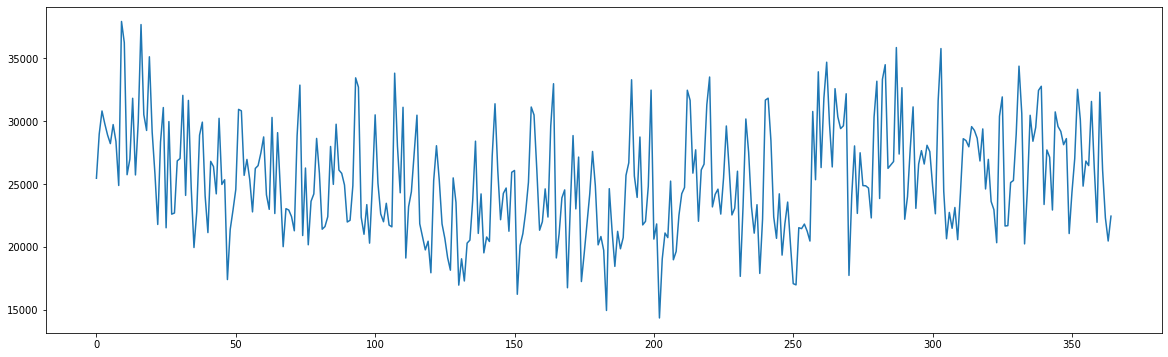

In [29]:
fig, ax = plt.subplots(figsize=(20,6))

ax = dados_2['consumo'].plot()

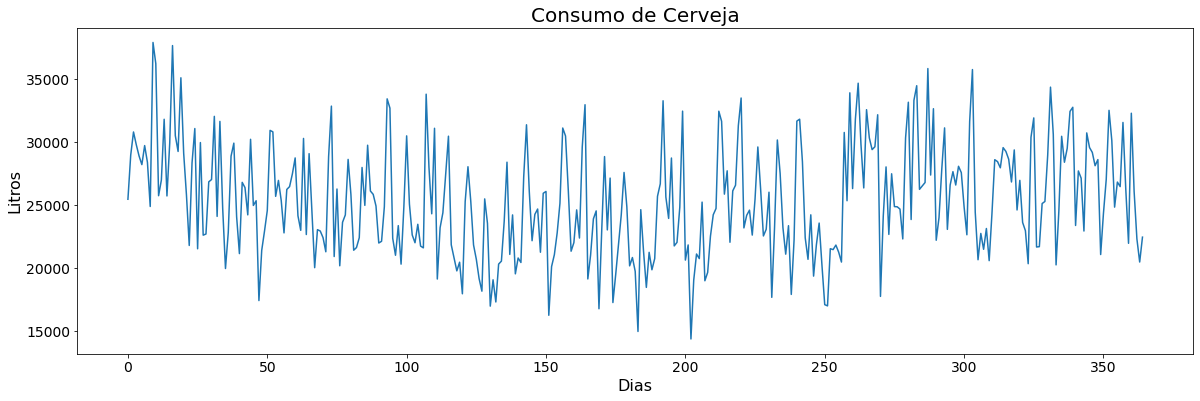

In [31]:
fig, ax = plt.subplots(figsize=(20,6))

# definindo um título para o gráfico
ax.set_title('Consumo de Cerveja', fontsize=20)

# definindo títulos para os eixos x e y
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)

# plotando o gráfico
ax = dados['consumo'].plot(fontsize=14)

# Exercício

Em nossa última aula, utilizamos a biblioteca **matplotlib** para visualizar o comportamento da variável dependente do nosso modelo ao longo do tempo. Abaixo, podemos ver um gráfico semelhante para outra variável de nosso dataset:

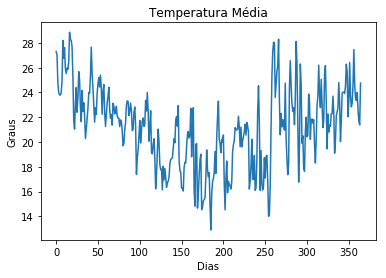

Assinale a alternativa que contém o código correto para gerar o gráfico acima.

TypeError: 'Text' object is not callable

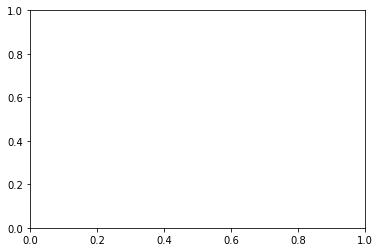

In [32]:
# a) 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.title('Temperatura Média')
ax.ylabel('Graus')
ax.xlabel('Dias')
ax = dados_2['temp_media'].plot()

'\nAlternativa correta! \nPerfeito, lembre-se que utilizando a função `subplots()` é possível gerar uma figura com mais de um gráfico em seu interior. \nConsulte a ajuda aqui para mais detalhes sobre a utilização desta função.\n'

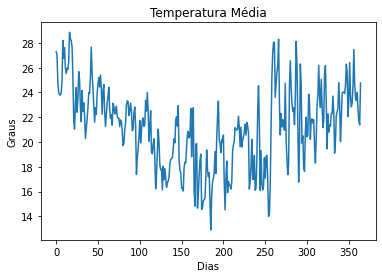

In [37]:
# b) 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_title('Temperatura Média')
ax.set_ylabel('Graus')
ax.set_xlabel('Dias')
ax = dados_2['temp_media'].plot()

'''
Alternativa correta! 
Perfeito, lembre-se que utilizando a função `subplots()` é possível gerar uma figura com mais de um gráfico em seu interior. 
Consulte a ajuda aqui para mais detalhes sobre a utilização desta função.
'''

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

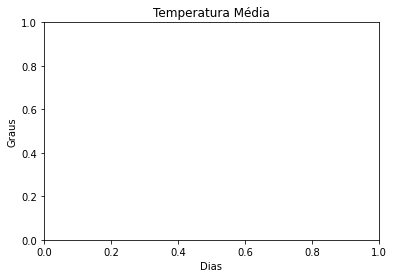

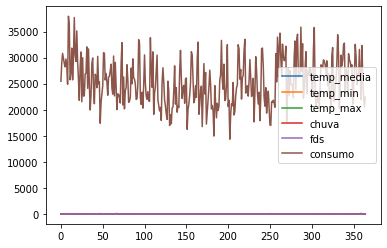

In [34]:
# c) 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_title('Temperatura Média')
ax.set_ylabel('Graus')
ax.set_xlabel('Dias')
ax = dados_2.plot()

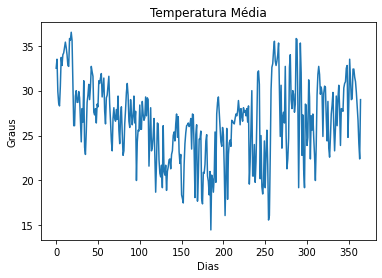

In [35]:
# d) 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_title('Temperatura Média')
ax.set_ylabel('Graus')
ax.set_xlabel('Dias')
ax = dados_2['temp_max'].plot()

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [38]:
# importando a biblioteca
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

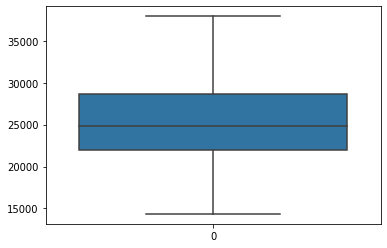

In [46]:
sns.boxplot(data=dados_2['consumo']);

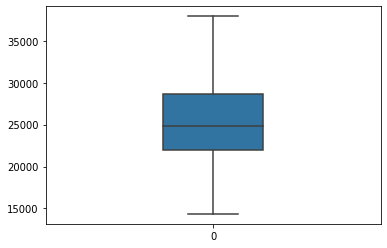

In [45]:
# editando a exibição do boxplot
sns.boxplot(data=dados_2['consumo'], 
            orient='v', width=0.3);

# orient, modo de visualização ('h', horizontal / 'v', vertical)
# width, largura da imagem

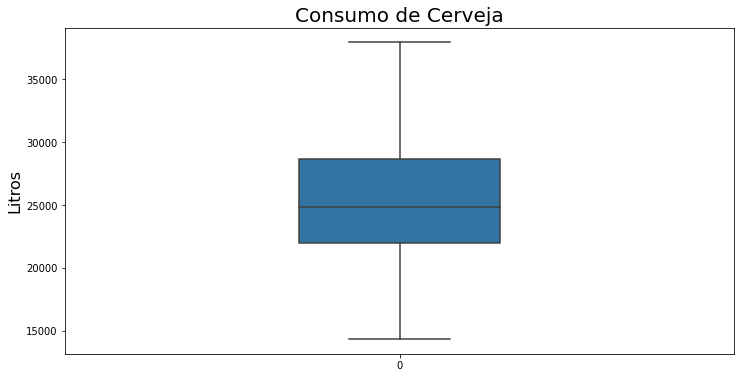

In [54]:
ax = sns.boxplot(data=dados_2['consumo'], 
            orient='v', width=0.3);

# definindo tamanho da figura
ax.figure.set_size_inches(12, 6)

# definindo um título para o gráfico
ax.set_title('Consumo de Cerveja', fontsize=20)

# definindo títulos para os eixo y
ax.set_ylabel('Litros', fontsize=16)

# plotando o gráfico
ax;

# Exercício

Sobre a ferramenta gráfica **box plot**, avalie as afirmativas abaixo:

1. O box plot nos ajuda a identificar a presença de algum tipo de assimetria na distribuição dos dados
2. Podemos utilizar o box plot como ferramenta para identificar possíveis outliers em nosso conjunto de dados
3. Para construir um box plot, precisamos da média e do primeiro e terceiro quartis da variável

    - As afirmativas 1 e 2 estão corretas.
        - Alternativa correta! `Duas das principais características de um box plot é a possibilidade de identificar a simetria ou assimetria (figura abaixo) do conjunto de dados e a presença de outliers.`
        
  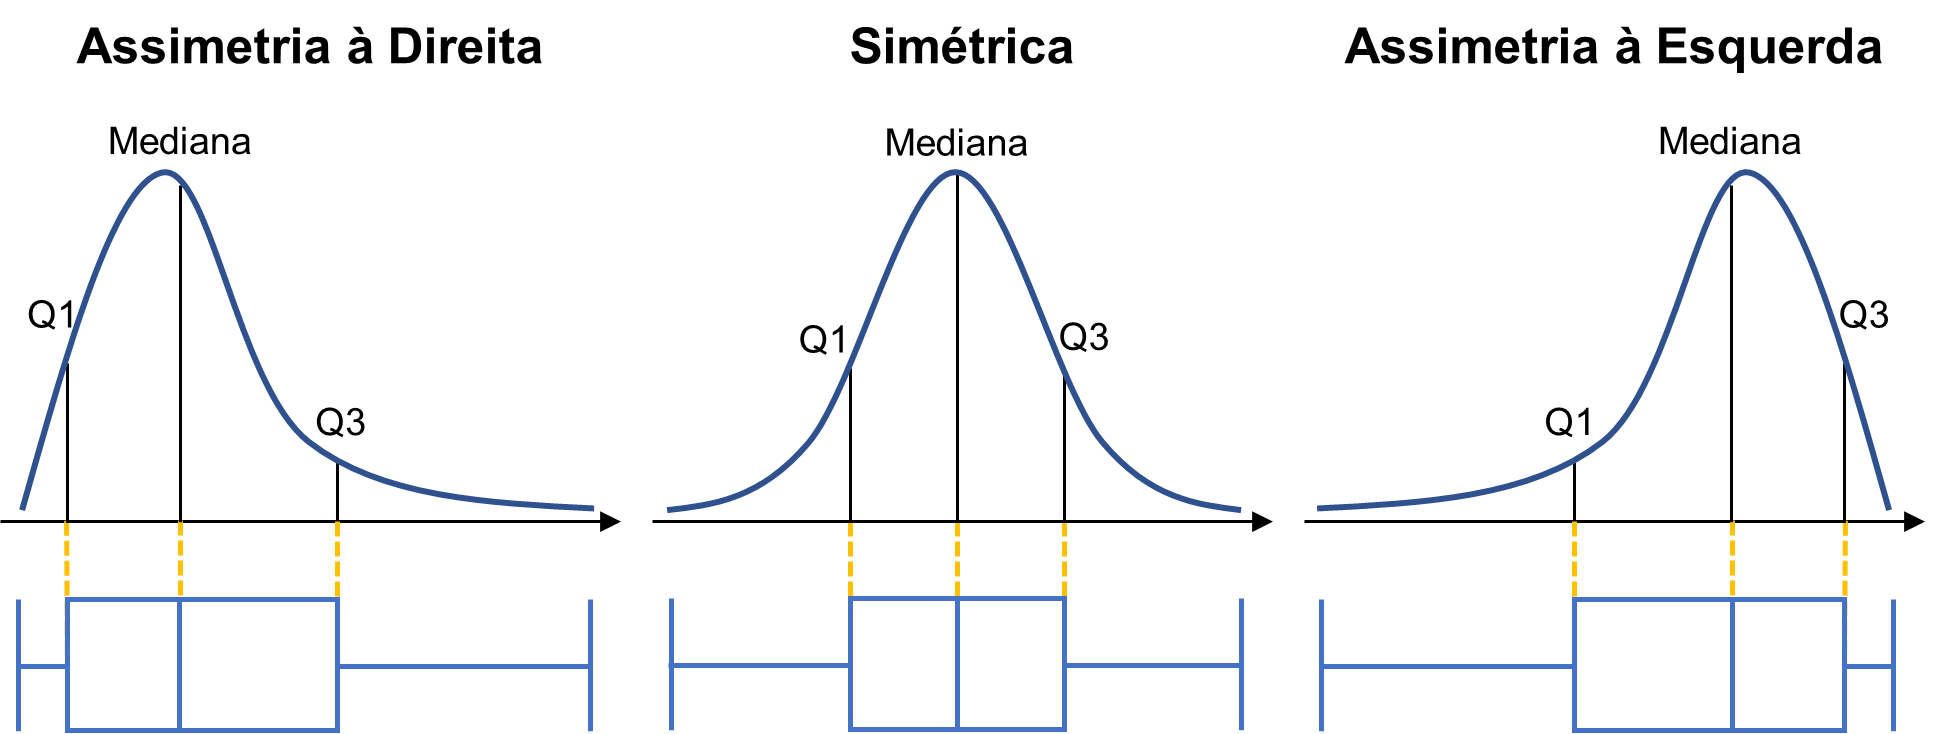      

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

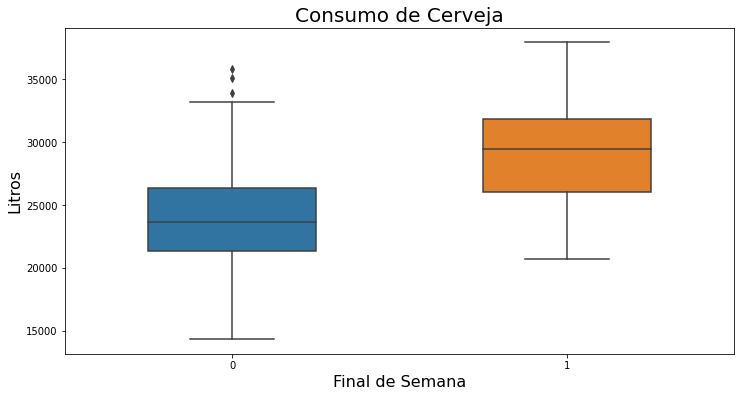

In [56]:
ax = sns.boxplot(x='fds', y='consumo', data=dados_2, 
            orient='v', width=0.5);

# definindo tamanho da figura
ax.figure.set_size_inches(12, 6)

# definindo um título para o gráfico
ax.set_title('Consumo de Cerveja', fontsize=20)

# definindo títulos para os eixos x e y
ax.set_xlabel('Final de Semana', fontsize=16)
ax.set_ylabel('Litros', fontsize=16)

# plotando o gráfico
ax;

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [57]:
# formatando a cor do box plot
sns.set_palette('Accent')

# formatando a cor do plano de fundo
sns.set_style('darkgrid')

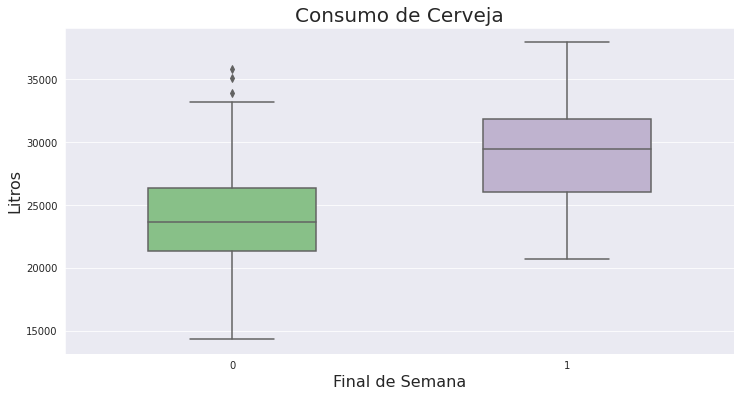

In [58]:
ax = sns.boxplot(x='fds', y='consumo', data=dados_2, 
            orient='v', width=0.5);

# definindo tamanho da figura
ax.figure.set_size_inches(12, 6)

# definindo um título para o gráfico
ax.set_title('Consumo de Cerveja', fontsize=20)

# definindo títulos para os eixos x e y
ax.set_xlabel('Final de Semana', fontsize=16)
ax.set_ylabel('Litros', fontsize=16)

# plotando o gráfico
ax;

# Exercício

Em nossa última aula, aprendemos a construir **box plots** com o cruzamento das informações de duas variáveis de nosso `dataset`. Esta técnica de visualização nos ajuda a identificar diferenças na distribuição de uma variável, quando separada em determinadas categorias.

Utilizando o nosso dataset, vamos executar o código abaixo para obter o box plot do consumo de cerveja, segundo a variável final de semana:

<AxesSubplot:title={'center':'Consumo de Cerveja'}, xlabel='Litros', ylabel='Final de Semana'>

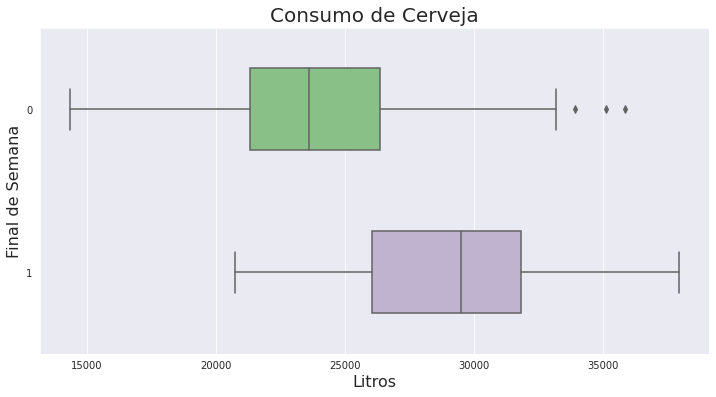

In [59]:
ax = sns.boxplot(y='fds', x='consumo', data=dados_2, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_xlabel('Litros', fontsize=16)
ax.set_ylabel('Final de Semana', fontsize=16)
ax

Avalie as alternativas abaixo e selecione as corretas. Lembre-se que a variável **"Final de Semana"** assume o valor `0 (zero) para dias de semana` e `1 (um) para finais de semana`.

- Quando analisamos o consumo de cerveja fora dos finais de semana, notamos alguns valores discrepantes, que devem ser investigados com maior atenção.
    - Alternativa correta! `Estes valores acima do limite superior do box plot devem ser verificados com mais detalhes antes de serem classificados como outliers e eliminados da amostra.`
    
    
- É possível inferir, através do gráfico, que o consumo de cerveja nos finais de semana é mais elevado.
    - Alternativa correta! `Note que o 1º quartil, mediana e 3º quartil apresentam valores superiores quando o consumo é medido nos finais de semana, o que comprova esta afirmação.`

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

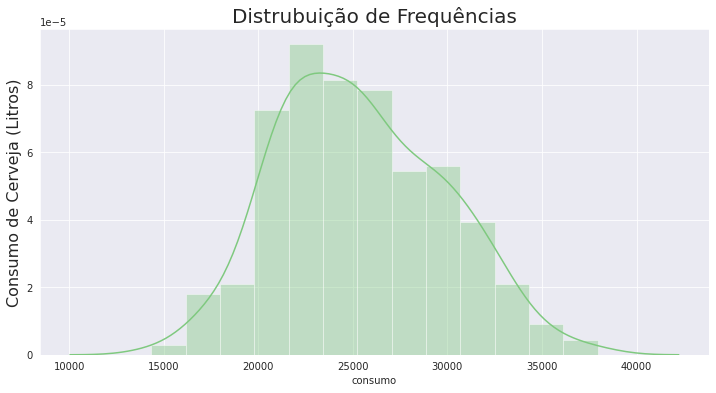

In [61]:
ax = sns.distplot(dados_2['consumo'])

ax.figure.set_size_inches(12, 6)

ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)

ax;

# Exercício

Sobre a distribuição da variável dependente, avalie as afirmativas abaixo:

1. Os métodos estatísticos mais conhecidos supõem que a variável dependente segue a distribuição normal

2. Uma forma preliminar de se averiguar a hipótese de normalidade da variável dependente é através do histograma

3. Uma das funções da biblioteca seaborn para plotar o histograma de uma variável é a `distplot()`

    - Todas as afirmativas estão corretas.
        - Alternativa correta! `Em alguns casos, a hipótese de normalidade não pode ser aceita. Veremos em outros treinamentos como proceder neste tipo de situação.`

Nesta aula, aprendemos:

- Como plotar a variável dependente
- Como importar a biblioteca **seaborn**
- Como criar um box-plot da variável dependente
- Como criar um box-plot de duas variáveis
- Como configurar os estilos e cores da biblioteca `seaborn`
- Como fazer um histograma com a variável dependente

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

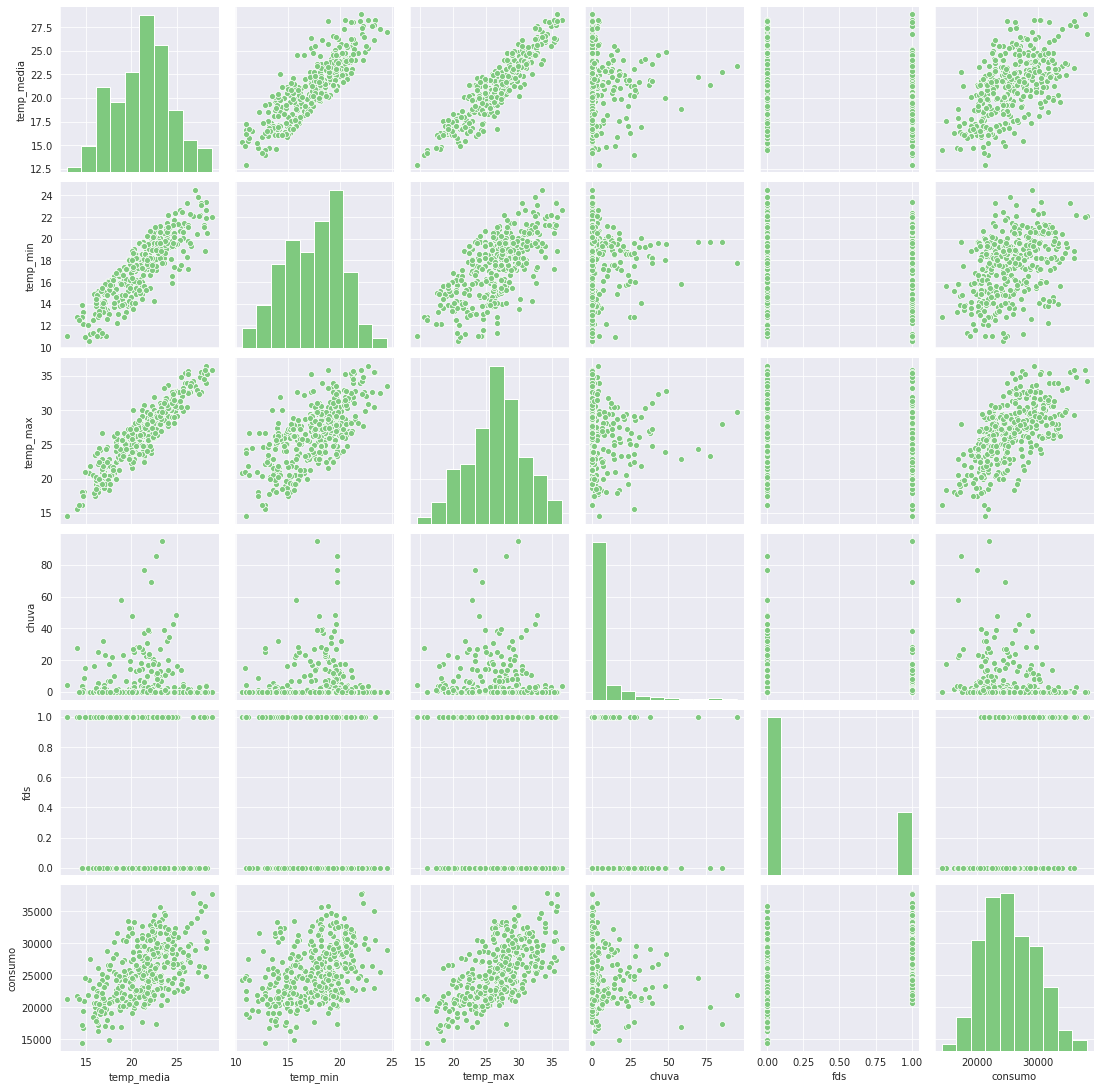

In [62]:
ax = sns.pairplot(dados_2)

## Plotando o pairplot fixando somente uma variável no eixo y

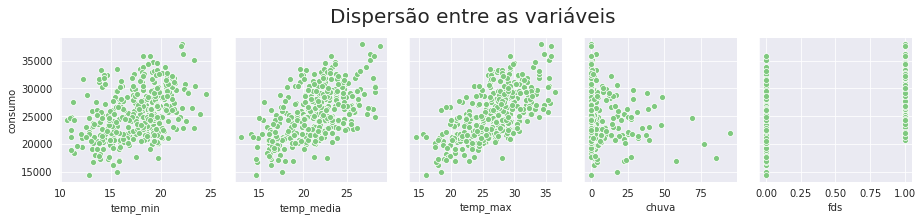

In [67]:
ax = sns.pairplot(dados_2, 
                  y_vars='consumo', 
                  x_vars=['temp_min', 
                          'temp_media', 
                          'temp_max', 
                          'chuva', 
                          'fds'])

ax.fig.suptitle('Dispersão entre as variáveis', 
              fontsize=20, y=1.15)

ax;

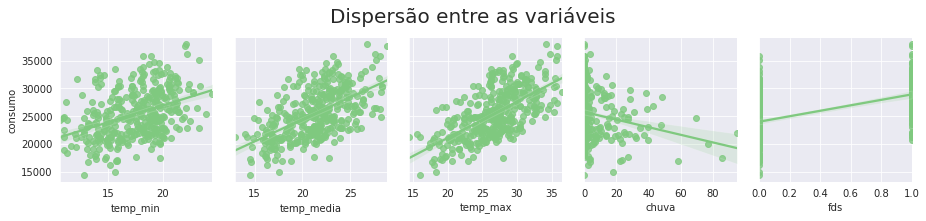

In [72]:
ax = sns.pairplot(dados_2, 
                  y_vars='consumo', 
                  x_vars=['temp_min', 
                          'temp_media', 
                          'temp_max', 
                          'chuva', 
                          'fds'], 
                 kind='reg')

ax.fig.suptitle('Dispersão entre as variáveis', 
              fontsize=20, y=1.15)

ax;

# Exercício

Sobre a relação entre as variáveis do modelo, assinale a alternativa correta:

- Com o uso de gráficos de dispersão, podemos identificar se duas variáveis apresentam uma relação linear entre elas e também a direção desta relação.

    - Alternativa correta! `Perfeito, foi este o objetivo de nossa última aula, utilizando a função pairplot(), do seaborn.`

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

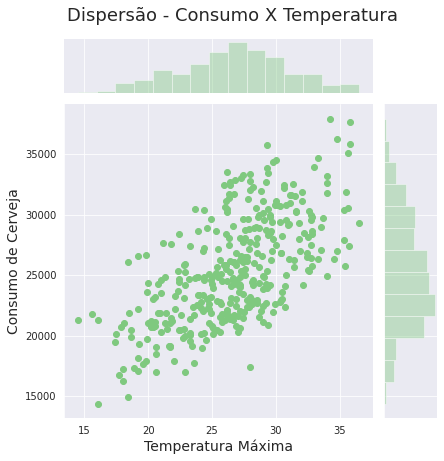

In [76]:
ax = sns.jointplot(x="temp_max", 
                   y="consumo", 
                   data=dados_2)

ax.fig.suptitle('Dispersão - Consumo X Temperatura', 
                fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", 
                   fontsize=14)

ax;

## Plotando um jointplot com a reta de regressão estimada

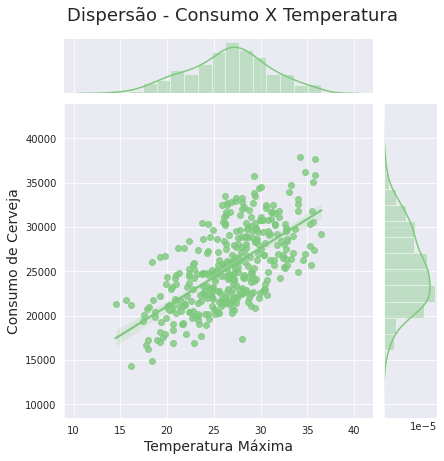

In [75]:
ax = sns.jointplot(x="temp_max", 
                   y="consumo", 
                   data=dados_2, 
                  kind='reg')

ax.fig.suptitle('Dispersão - Consumo X Temperatura', 
                fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", 
                   fontsize=14)

ax;

# Exercício

Analise do gráfico abaixo:

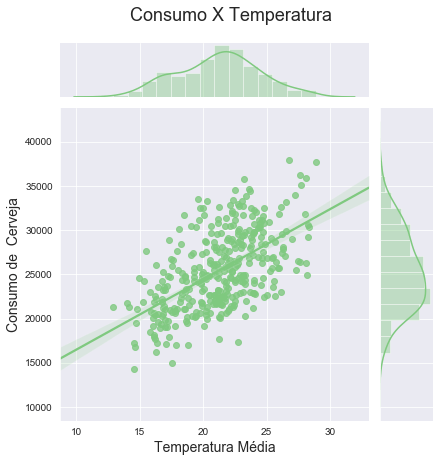

Utilizando o nosso `dataset`, assinale a alternativa que apresenta o código responsável pela construção do gráfico acima.

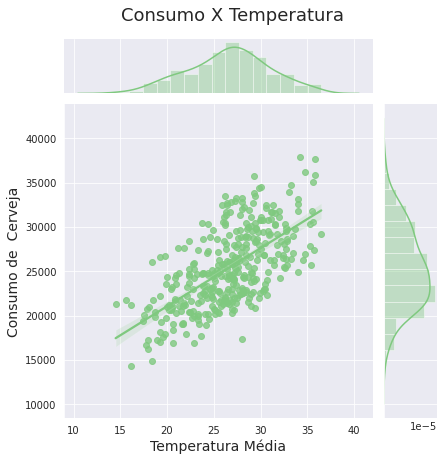

In [79]:
# a) 
ax = sns.jointplot(x="temp_max", y="consumo", data=dados_2, kind='reg')
ax.fig.suptitle('Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Média", "Consumo de  Cerveja", fontsize=14)

In [80]:
# b) 
ax = sns.pairplot(x="temp_media", y="consumo", data=dados_2, kind='reg')
ax.fig.suptitle('Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Média", "Consumo de  Cerveja", fontsize=14)

TypeError: pairplot() got an unexpected keyword argument 'x'

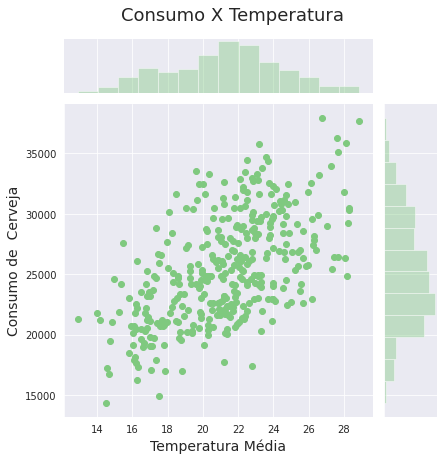

In [81]:
# c) 
ax = sns.jointplot(x="temp_media", y="consumo", data=dados_2)
ax.fig.suptitle('Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Média", "Consumo de  Cerveja", fontsize=14)

"\nAlternativa correta! \nEste é o jointplot que construímos na última aula, com apenas duas modificações:\n\nA variável do eixo X (temperatura média)\nO parâmetro kind='reg'\n"

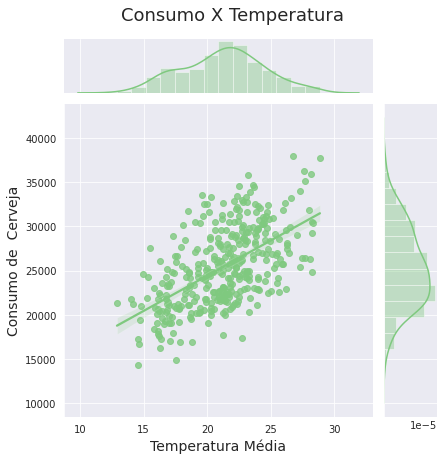

In [83]:
# d) 
ax = sns.jointplot(x="temp_media", y="consumo", data=dados_2, kind='reg')
ax.fig.suptitle('Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Média", "Consumo de  Cerveja", fontsize=14)

'''
Alternativa correta! 
Este é o jointplot que construímos na última aula, com apenas duas modificações:

A variável do eixo X (temperatura média)
O parâmetro kind='reg'
'''

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

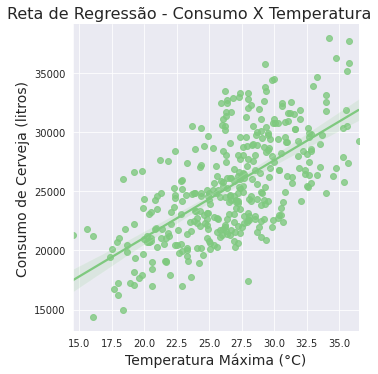

In [84]:
ax= sns.lmplot(x="temp_max", 
               y="consumo", 
               data=dados_2)

ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', 
                fontsize=16, 
                y=1.02)

ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)

ax;

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

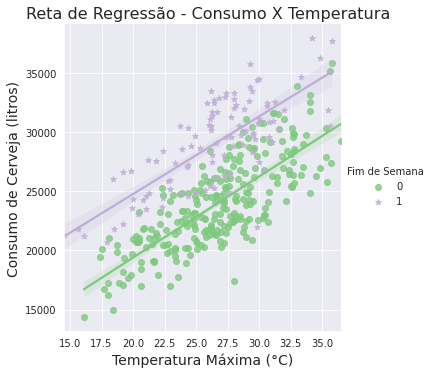

In [85]:
ax= sns.lmplot(x="temp_max", 
               y="consumo", 
               data=dados_2, 
              hue='fds', 
              markers=['o', '*'], 
              legend=False)

ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', 
                fontsize=16, 
                y=1.02)

ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title='Fim de Semana')

ax;

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

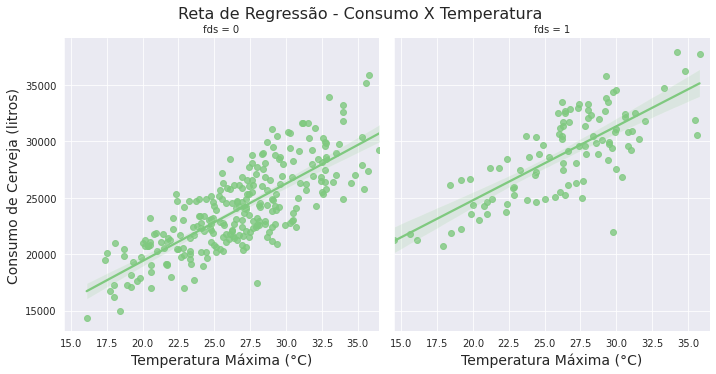

In [86]:
ax= sns.lmplot(x="temp_max", 
               y="consumo", 
               data=dados_2, 
              col='fds')

ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', 
                fontsize=16, 
                y=1.02)

ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)

ax;

# Exercício

A função `lmplot()`, do `seaborn`, é mais uma ferramenta para análise da dispersão dos dados de um modelo. Como a `pairplot()` e `jointplot()`, a função `lmplot()` permite plotar a dispersão entre duas variáveis e também traçar a reta de regressão estimada entre elas.

Agora, analise o código abaixo:

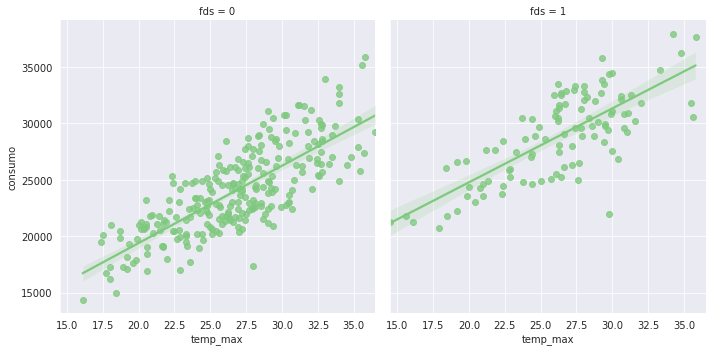

In [88]:
import seaborn as sns
sns.lmplot(x="temp_max", 
           y="consumo", 
           data=dados_2, 
           col="fds");

A função `lmplot()` permite gerar dispersões entre duas variáveis, segundo uma terceira variável. No caso acima, é uma análise da relação entre consumo de cerveja e temperatura máxima, segundo a variável final de semana.

Nesta aula, aprendemos:

- Como plotar gráficos de dispersão entre as variáveis do dataset com `pairplot`, `jointplot` e `lmplot`
- Como ocultar ou modificar para visualizar uma única vez os **warnings** do Jupyter

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [89]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [90]:
y = dados_2['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [91]:
X = dados_2[['temp_max', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [93]:
X_train.shape

(255, 3)

In [94]:
X_test.shape

(110, 3)

In [95]:
X_train.shape[0] + X_test.shape[0]

365

In [96]:
X.shape[0] * 0.3

109.5

In [97]:
X.shape[0] * 0.7

255.49999999999997

# Exercício

Qual biblioteca Python traz um ferramental bastante amplo para trabalharmos com modelos de `machine learning`?

- sckit-learn
    - A biblioteca **scikit-learn** é de código aberto e inclui uma séria de algoritmos para `modelos de machine learning (classificação, regressão, agrupamento, etc)`.

A técnica de separação aleatória de um dataset em dois conjuntos distintos (conjuntos de treino e teste), estimar o modelo com os dados de um destes conjuntos (conjunto de treino) e posteriormente realizar estimações com os dados do segundo conjunto (conjunto de teste) é uma técnica bastante utilizada em data science, para confirmar a eficácia do modelo estimado.

O **scikit-learn** disponibiliza uma função que faz essa separação, basta que informemos os dados de nosso modelo e qual o tamanho desejado dos conjuntos de treino e teste. Seria da seguinte forma o código:

In [98]:
train_test_split(X, y, test_size=0.3)

[     temp_max  chuva  fds
 0        32.5    0.0    0
 204      25.8    0.0    0
 266      35.3    0.0    0
 351      33.5    0.1    0
 293      32.0    0.0    0
 ..        ...    ...  ...
 173      25.5    0.0    0
 58       27.7    0.0    1
 235      20.5    0.0    0
 14       32.8    3.0    0
 6        33.7    0.0    0
 
 [255 rows x 3 columns],
      temp_max  chuva  fds
 252      25.6    0.0    0
 227      27.2    0.0    1
 150      18.4    5.6    1
 251      22.9   58.0    0
 109      29.2   20.2    0
 ..        ...    ...  ...
 105      26.7   25.4    0
 315      31.8    0.0    0
 164      27.3    0.0    1
 333      23.3   23.4    0
 85       30.8    0.0    0
 
 [110 rows x 3 columns],
 0      25461
 204    21104
 266    30345
 351    27042
 293    31139
        ...  
 173    27146
 58     26467
 235    23210
 14     25724
 6      29732
 Name: consumo, Length: 255, dtype: int64,
 252    21525
 227    26272
 150    26081
 251    16977
 109    24304
        ...  
 105    21735
 31

Onde `X` é o nosso conjunto de variáveis explicativas, `y` a nossa variável dependente e `test_size` o percentual da base que desejamos separar para testes, no caso acima, 30%.

Esta função retorna, para o conjunto de variáveis explicativas (`X`), um conjunto de treino e outro de teste (`X_train e X_test`) e para a variável dependente (`y`), um conjunto de treino e outro para teste (`y_train e y_test`). Assinale a alternativa que mostra a ordem correta de retorno desta função.

- X_train, X_test, y_train, y_test
    - Observe que a seleção destes conjuntos é feita de forma aleatória e para repetir o processo, mantendo sempre o mesmo conjunto selecionado, devemos configurar o parâmetro `random_state`.

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [101]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [102]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [107]:
# print('R² = {}'.format(modelo.score(X_train, 
#                                     y_train).round(2)))

print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [108]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [110]:
#print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.69


# Exercício

Sobre a estimativa de um modelo de regressão linear, avalie as afirmativas abaixo:

1. O coeficiente de determinação (R²) é uma medida resumida, que diz o quanto a linha de regressão ajusta-se aos dados

2. A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas

3. O coeficiente de determinação (R²) é um valor entre -1 e 1


   - As afirmativas 1 e 2 estão corretas.
       - Lembre-se que o R² mede o quanto da variação da variável dependente é explicada pelo modelo estimado.

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [111]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [114]:
modelo.predict(entrada)[0].round(4)

26094.9018

## Criando um simulador simples

In [119]:
temp_max=30.5
chuva=12.2
fds=0
entrada = [[temp_max, chuva, fds]]

print(f'{modelo.predict(entrada)[0]:.2f} litros')

26094.90 litros


In [120]:
temp_max=40
chuva=0
fds=1
entrada = [[temp_max, chuva, fds]]

print(f'{modelo.predict(entrada)[0]:.2f} litros')

38742.53 litros


# Exercício

Das alternativas abaixo, indique qual o método, da biblioteca **scikit-learn**, utilizado para obter previsões.

- .predict()
    - Com o método `.predict()`, precisamos passar como parâmetros os valores das variáveis explicativas, para obtermos uma previsão da variável dependente.

# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [121]:
modelo.intercept_

5951.9763393124485

In [123]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [124]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [125]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [126]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [127]:
index = ['Intercepto', 'Temperatura Máxima', 
        'Chuva (mm)', 'Final de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [128]:
pd.DataFrame(data=np.append(modelo.intercept_, 
                           modelo.coef_), 
            index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# Exercício

Avalie as afirmativas abaixo:

1. O intercepto representa o efeito médio em Y (variável dependente), tendo todas as variáveis explicativas excluídas do modelo

2. Os coeficientes de regressão (β’s) são conhecidos como coeficientes parciais de regressão, ou coeficientes parciais angulares

3. Considerando os resultados dos coeficientes de regressão do modelo estimado em nossa aula:

                              Parâmetros
        Intercepto	        5951.976339
        Temperatura Máxima	684.736759
        Chuva (mm)	        -60.782435
        Final de Semana	   5401.083339
        
        
É possível afirmar que, mantendo-se os valores de **Chuva (mm)** e **Final de Semana** constantes, o acréscimo de 1°C na **Temperatura Máxima** gera uma variação média no **Consumo de Cerveja** de `684,74 litros`.

- Todas as afirmativas estão corretas.
    - Estude novamente o nosso notebook para fixar bem este conceito importante.

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [130]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

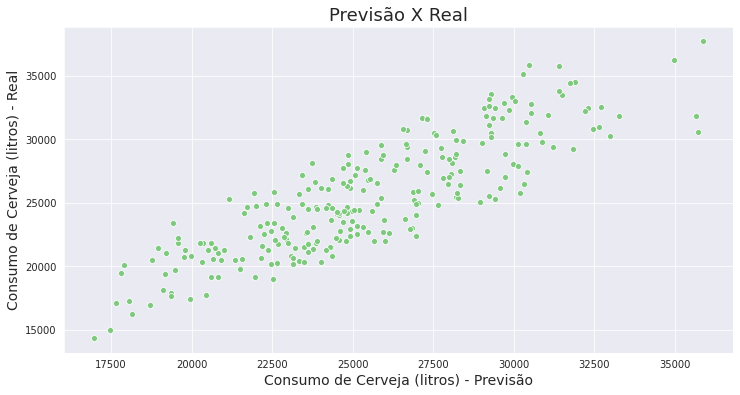

In [132]:
ax = sns.scatterplot(x=y_previsto_train, 
                    y=y_train)

ax.figure.set_size_inches(12, 6)

ax.set_title('Previsão X Real', fontsize=18)

ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)

ax;

## Obtendo os resíduos

In [134]:
residuo = y_train - y_previsto_train
#residuo

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

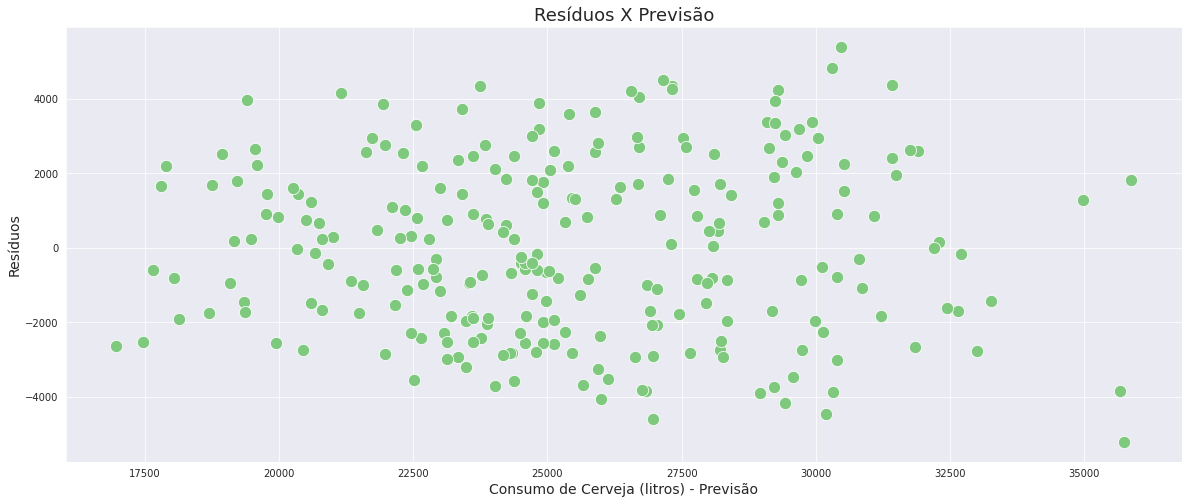

In [135]:
ax = sns.scatterplot(x=y_previsto_train, 
                    y=residuo, s=150)

ax.figure.set_size_inches(20, 8)

ax.set_title('Resíduos X Previsão', fontsize=18)

ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)

ax;

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

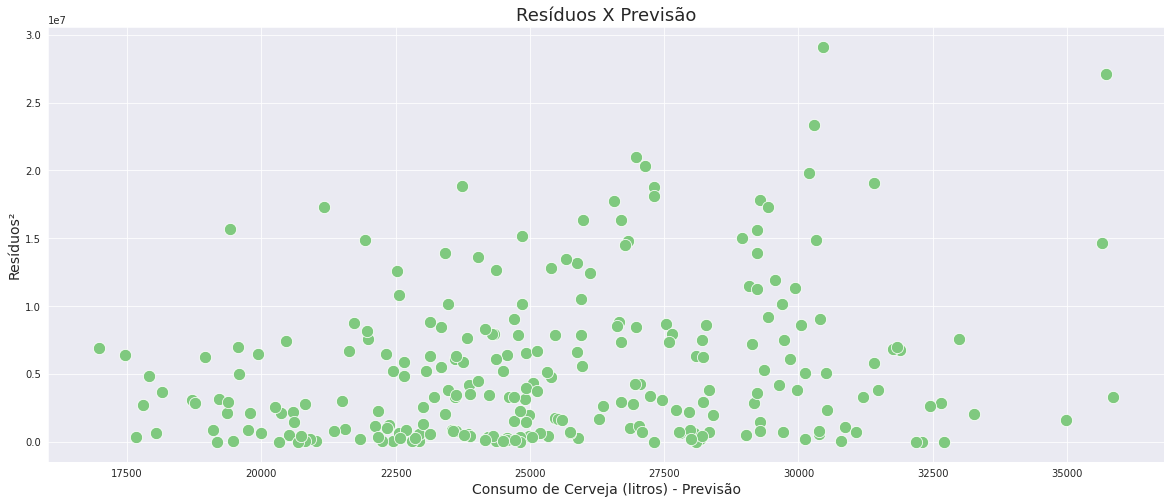

In [137]:
ax = sns.scatterplot(x=y_previsto_train, 
                    y=residuo**2, s=150)

ax.figure.set_size_inches(20, 8)

ax.set_title('Resíduos X Previsão', fontsize=18)

ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)

ax;

## Plotando a distribuição de frequências dos resíduos

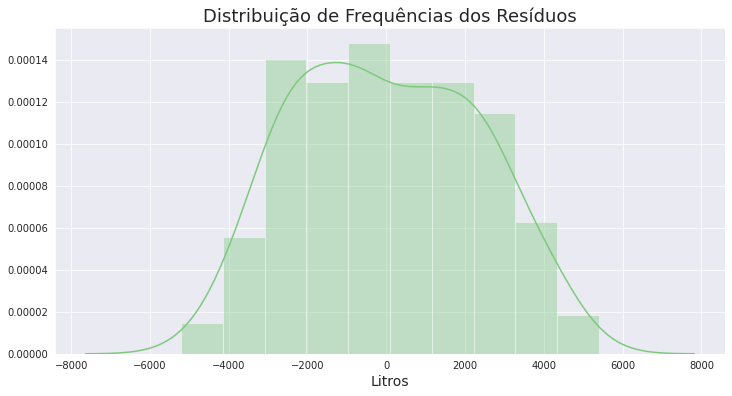

In [141]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(12, 6)

ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)

ax.set_xlabel('Litros', fontsize=14)


ax;

# Exercício

Assumindo que os dados reais da variável dependente sejam representados por `y_Real`, os dados reais das variáveis explicativas sejam representados por `X_Real` e que os dados de previsão, obtidos por um modelo de regressão, são representados por `y_Previsto`, indique abaixo a opção que mostra a operação correta para se obter os resíduos do modelo.

- residuo = y_Real – y_Previsto
    - `A diferença entre o valor real (observado) e a estimativa do modelo é conhecido como resíduo`.

Qual função gráfica do **seaborn** utilizamos para plotar os dados de previsão do modelo contra os dados reais da variável dependente?

- .scatterplot()
    - `Com o scatterplot(), é possível plotar gráficos de dispersão entre variáveis.`

Nesta aula, aprendemos:

- Como preparar os dados e criar os datasets de treino e de teste
- Como verificar os tamanhos dos arquivos gerados pela função `train_test_split`
- Como estimar um modelo de regressão linear
- Como obter previsões pontuais
- Como interpretar os coeficientes estimados
- Como fazer análises gráficas das previsões

Nesta aula, aprendemos:

- Como estimar um novo modelo, mas dessa vez utilizando outra variável explicativa

- Como criar os datasets de treino e teste do novo modelo

- Como comparar os dois modelos

- Outras métricas de regressão
    - Erro quadrático médio e sua raiz

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [151]:
X2 = dados_2[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [152]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, 
                                                    test_size=0.30, 
                                                    random_state=2811)

## Instanciando a classe *LinearRegression()*

In [153]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [154]:
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [155]:
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temp. Média
R² = 0.66


In [156]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temp. Máxima
R² = 0.73


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [157]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [158]:
print('Modelo com Temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, 
                                        y_previsto_2).round(2)))

Modelo com Temp. Média
R² = 0.66


In [159]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, 
                                        y_previsto).round(2)))

Modelo com Temp. Máxima
R² = 0.69


# Exercício

Sobre a comparação entre modelos, marque as alternativas corretas:

- A comparação entre modelos só é possível quando a variável dependente, dos modelos em comparação, for a mesma.
    - `A comparação entre modelos com variáveis dependentes diferentes não é válida`.
    
    
- Uma das formas de avaliar a comparação e poder decidir qual o melhor modelo é através da observação dos coeficientes de determinação dos modelos comparados.
    - `O R² é uma métrica que nos diz quanto da variação da variável dependente foi explicada pelo nosso ajuste. Valores mais próximos de 1 indicam modelos mais bem ajustados`.

# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [160]:
EQM_2 = metrics.mean_squared_error(y2_test, 
                                   y_previsto_2).round(2)

REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, 
                                            y_previsto_2)).round(2)

R2_2 = metrics.r2_score(y2_test, 
                        y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], 
             columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [161]:
EQM = metrics.mean_squared_error(y_test, 
                                   y_previsto).round(2)

REQM = np.sqrt(metrics.mean_squared_error(y_test, 
                                            y_previsto)).round(2)

R2 = metrics.r2_score(y_test, 
                        y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], 
             columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


# Exercício

Assinale a alternativa que apresenta as três métricas de regressão que aprendemos em nosso treinamento:

- Coeficiente de determinação; Erro quadrático médio; e Raiz do erro quadrático médio
    - `Em nosso notebook, você encontra as fórmulas de cálculos de todas estas métricas`.

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [163]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [164]:
entrada = X_test[0:1]

## Gerando previsão pontual

In [166]:
modelo.predict(entrada)[0].round(4)

26094.9018

## Criando um simulador simples

In [173]:
temp_max=30.5
chuva=12.2
fds=0
entrada=[[temp_max, chuva, fds]]

#print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))
print(f'{modelo.predict(entrada)[0]:.2f} litros.')

26094.90 litros.


In [175]:
temp_max=35
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

#print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))
print(f'{modelo.predict(entrada)[0]:.2f} litros.')

35318.85 litros.


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [176]:
import pickle

In [177]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```

# Exercício

Em nosso treinamento, utilizamos a biblioteca `pickle` para salvar o nosso modelo estimado em um arquivo binário. Este procedimento nos permite reutilizar o nosso modelo, sem precisar rodar todo o processo de estimação novamente.

Apenas duas funcionalidades da biblioteca `pickle` foram utilizadas em nosso projeto, uma para armazenar o modelo em um arquivo e outra para carregar na memória o modelo armazenado neste arquivo. Indique a opção que apresenta estas duas funcionalidades.

- pickle.dump() e pickle.load()
    - O módulo `pickle` implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.

Revisando o conteúdo até aqui, avalie as afirmativas abaixo:

1. O coeficiente de correlação é uma medida de associação linear entre duas variáveis e situa-se entre -1 e +1, sendo que -1 indica associação negativa perfeita, e +1 indica associação positiva perfeita


2. O `jointplot()`, da biblioteca **seaborn**, plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência


3. Em uma comparação entre modelos, devemos priorizar a escolha do modelo que apresentar o maior erro quadrático médio (EQM).


- As afirmativas 1 e 2 estão corretas.
    - `Lembre-se que o EQM deve ser minimizado e o R² deve ser maximizado`.

Ainda revisando o conhecimento adquirido até aqui, avalie as afirmativas abaixo:

1. Gráficos de dispersão entre a variável dependente (Y) e as explicativas (X’s) nos ajudam a identificar a presença de uma relação linear entre as variáveis


2. Quando acrescentamos uma variável explicativa em nosso modelo, é possível que a métrica R² tenha uma redução em seu valor


3. Através de um histograma, podemos avaliar, preliminarmente, se a variável dependente segue uma distribuição normal.


- As alternativas 1 e 3 estão corretas.
    - `A análise gráfica é uma técnica estatística bastante importante em um processo de modelagem`.

Nesta aula, aprendemos:

- Como salvar e carregar o modelo estimado, utilizando a biblioteca `pickle`


- Um simulador interativo para Jupyter